# Telecom Customer Revenue Analysis

## 📊 Project Overview
Analysis of customer behavior and revenue optimization for Megaline telecom company, comparing Surf vs Ultimate prepaid plans using Python and statistical analysis.

## 🎯 Business Problem
Determine which prepaid plan generates more revenue to optimize advertising budget allocation.

## 📈 Key Findings
- Ultimate plan generates 20% higher average monthly revenue ($72.31 vs $60.33)
- 58% of Surf users exceed data limits vs only 6% of Ultimate users
- Statistical significance confirmed (p < 0.001)

## 🛠️ Technologies Used
- Python (pandas, numpy, scipy, matplotlib, seaborn)
- Statistical hypothesis testing
- Data visualization
- Jupyter Notebook

In [403]:
# ============================================================
# Telecom Customer Revenue Analysis
# Author: Malcolm Killian
# Purpose: Analyze customer usage and revenue patterns to
#          understand plan performance and customer behavior
# ============================================================

# -----------------------------
# Environment Setup
# -----------------------------

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats as st

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:,.2f}".format)

# -----------------------------
# Project Paths
# -----------------------------

PROJECT_ROOT = Path.cwd()
DATA_PATH = PROJECT_ROOT / "data" / "raw"

# Validate data directory
assert DATA_PATH.exists(), f"Data directory not found: {DATA_PATH}"

print("Project root:", PROJECT_ROOT)
print("Data path:", DATA_PATH)
print("Files found:", [f.name for f in DATA_PATH.iterdir()])

Project root: c:\Users\killi\OneDrive\Documents\telecom-revenue-analysis
Data path: c:\Users\killi\OneDrive\Documents\telecom-revenue-analysis\data\raw
Files found: ['calls_per_month.csv', 'megaline_calls.csv', 'megaline_internet.csv', 'megaline_messages.csv', 'megaline_plans.csv', 'megaline_users.csv', 'messages_per_month.csv', 'minutes_per_month.csv', 'traffic_per_month.csv']


In [404]:
# -----------------------------
# Dataset Registry & Loader
# -----------------------------

FILES = {
    "calls": "megaline_calls.csv",
    "internet": "megaline_internet.csv",
    "messages": "megaline_messages.csv",
    "plans": "megaline_plans.csv",
    "users": "megaline_users.csv"
}

def load_dataset(name, date_col=None):
    """
    Load and standardize a dataset.

    Parameters:
    -----------
    name : str
        Dataset key from FILES dictionary
    date_col : str, optional
        Column name to parse as datetime

    Returns:
    --------
    pd.DataFrame
    """
    if name not in FILES:
        raise ValueError(f"Dataset '{name}' not registered. Choose from {list(FILES.keys())}")

    path = DATA_PATH / FILES[name]

    if not path.exists():
        raise FileNotFoundError(f"Missing file: {path}")

    df = pd.read_csv(path)

    # Standardize column names
    df.columns = (
        df.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
    )

    # Parse date column if provided
    if date_col and date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

    print(f"Loaded {name}: {df.shape[0]:,} rows, {df.shape[1]} columns")

    return df

## Load data

In [405]:
calls_df = load_dataset("calls", "call_date")
internet_df = load_dataset("internet", "session_date")
messages_df = load_dataset("messages", "message_date")
plans_df = load_dataset("plans")
users_df = load_dataset("users")

Loaded calls: 137,735 rows, 4 columns
Loaded internet: 104,825 rows, 4 columns
Loaded messages: 76,051 rows, 3 columns
Loaded plans: 2 rows, 8 columns
Loaded users: 500 rows, 8 columns


In [406]:

# -----------------------------
# Data Quality Report
# -----------------------------

def data_quality_report(df, name="dataset"):
    """
    Generate a structured data quality report for a DataFrame.

    Returns a summary table with:
    - Data types
    - Missing values
    - Missing percentage
    - Unique values
    """
    report = pd.DataFrame({
        "column": df.columns,
        "dtype": df.dtypes.astype(str),
        "missing_values": df.isna().sum(),
        "missing_pct": (df.isna().mean() * 100).round(2),
        "unique_values": df.nunique()
    })

    print(f"\nDATA QUALITY REPORT — {name.upper()}")
    print("-" * 60)

    return report.sort_values(by="missing_pct", ascending=False)

In [407]:
# -----------------------------
# Run Data Quality Checks
# -----------------------------

datasets = {
    "Calls": calls_df,
    "Internet": internet_df,
    "Messages": messages_df,
    "Plans": plans_df,
    "Users": users_df
}

for name, df in datasets.items():
    display(data_quality_report(df, name))


DATA QUALITY REPORT — CALLS
------------------------------------------------------------


,column,dtype,missing_values,missing_pct,unique_values
id,id,object,0,0.00,137735
user_id,user_id,int64,0,0.00,481
call_date,call_date,datetime64[ns],0,0.00,351
duration,duration,float64,0,0.00,2802



DATA QUALITY REPORT — INTERNET
------------------------------------------------------------


,column,dtype,missing_values,missing_pct,unique_values
id,id,object,0,0.00,104825
user_id,user_id,int64,0,0.00,489
session_date,session_date,datetime64[ns],0,0.00,351
mb_used,mb_used,float64,0,0.00,57624



DATA QUALITY REPORT — MESSAGES
------------------------------------------------------------


,column,dtype,missing_values,missing_pct,unique_values
id,id,object,0,0.00,76051
user_id,user_id,int64,0,0.00,402
message_date,message_date,datetime64[ns],0,0.00,351



DATA QUALITY REPORT — PLANS
------------------------------------------------------------


,column,dtype,missing_values,missing_pct,unique_values
messages_included,messages_included,int64,0,0.00,2
mb_per_month_included,mb_per_month_included,int64,0,0.00,2
minutes_included,minutes_included,int64,0,0.00,2
usd_monthly_pay,usd_monthly_pay,int64,0,0.00,2
usd_per_gb,usd_per_gb,int64,0,0.00,2
usd_per_message,usd_per_message,float64,0,0.00,2
usd_per_minute,usd_per_minute,float64,0,0.00,2
plan_name,plan_name,object,0,0.00,2



DATA QUALITY REPORT — USERS
------------------------------------------------------------


,column,dtype,missing_values,missing_pct,unique_values
churn_date,churn_date,object,466,93.20,29
user_id,user_id,int64,0,0.00,500
first_name,first_name,object,0,0.00,458
last_name,last_name,object,0,0.00,399
age,age,int64,0,0.00,58
city,city,object,0,0.00,73
reg_date,reg_date,object,0,0.00,266
plan,plan,object,0,0.00,2


In [408]:
# -----------------------------
# Executive Dataset Summary Table (Fixed User Detection)
# -----------------------------

def build_summary_table(datasets):
    rows = []

    for name, df in datasets.items():
        row = {
            "dataset": name,
            "rows": len(df),
            "columns": len(df.columns),
        }

        # Prefer true user_id over generic id
        if "user_id" in df.columns:
            row["unique_users"] = df["user_id"].nunique()
        elif "id" in df.columns:
            row["unique_users"] = "N/A"
        else:
            row["unique_users"] = "N/A"

        # Detect date ranges
        date_cols = df.select_dtypes(include=["datetime64[ns]"]).columns
        if len(date_cols) > 0:
            col = date_cols[0]
            row["date_range"] = f"{df[col].min().date()} → {df[col].max().date()}"
        else:
            row["date_range"] = "N/A"

        # Missing data %
        row["missing_pct"] = round(df.isna().mean().mean() * 100, 2)

        rows.append(row)

    return pd.DataFrame(rows)

summary_table.style.format({
    "rows": "{:,}",
    "missing_pct": "{:.2f}%"
})

,dataset,rows,columns,unique_users,date_range,missing_pct
0,Calls,"137,735",4,137735,2018-01-15 → 2018-12-31,0.00%
1,Internet,"104,825",4,104825,2018-01-15 → 2018-12-31,0.00%
2,Messages,"76,051",3,76051,2018-01-15 → 2018-12-31,0.00%
3,Plans,2,8,N/A,N/A,0.00%
4,Users,500,8,500,N/A,11.65%


## Prepare Plans Dataset

In [409]:
# -----------------------------
# Prepare Plans Dataset (Schema-Matched Version)
# -----------------------------

def prepare_plans(df):
    """
    Clean and standardize the plans reference table for revenue modeling.
    Includes base fees, usage limits, and overage rates.
    """
    plans = df.copy()

    # Standardize column names
    plans.columns = (
        plans.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
    )

    # Rename to business-friendly schema
    rename_map = {
        "plan_name": "plan",
        "usd_monthly_pay": "monthly_fee",
        "usd_per_minute": "rate_per_minute",
        "usd_per_message": "rate_per_message",
        "usd_per_gb": "rate_per_gb",
        "minutes_included": "included_minutes",
        "messages_included": "included_messages",
        "mb_per_month_included": "included_mb"
    }

    plans = plans.rename(columns=rename_map)

    # Convert numeric fields
    numeric_cols = [
        "monthly_fee",
        "rate_per_minute",
        "rate_per_message",
        "rate_per_gb",
        "included_minutes",
        "included_messages",
        "included_mb"
    ]

    for col in numeric_cols:
        if col in plans.columns:
            plans[col] = pd.to_numeric(plans[col], errors="coerce")

    # Validate primary key
    if plans["plan"].duplicated().any():
        raise ValueError("Duplicate plan names detected — plans table must be unique")

    # Derived fields
    plans["included_gb"] = (plans["included_mb"] / 1024).round(2)

    # Final column order (presentation + modeling ready)
    column_order = [
        "plan",
        "monthly_fee",
        "included_minutes",
        "included_messages",
        "included_mb",
        "included_gb",
        "rate_per_minute",
        "rate_per_message",
        "rate_per_gb"
    ]

    plans = plans[column_order]

    print("Plans dataset prepared")
    print(plans)

    return plans

plans_clean = prepare_plans(plans_df)


Plans dataset prepared
       plan  monthly_fee  included_minutes  included_messages  included_mb  \
0      surf           20               500                 50        15360   
1  ultimate           70              3000               1000        30720   

   included_gb  rate_per_minute  rate_per_message  rate_per_gb  
0        15.00             0.03              0.03           10  
1        30.00             0.01              0.01            7  


### Plans Data Review Summary

The plans dataset is clean and well-structured, containing two unique service plans (`surf` and `ultimate`) with complete pricing, usage limits, and overage rates. All monetary and usage fields are stored as numeric values and are suitable for revenue calculations, and the `plan` column serves as a valid primary key with no duplicates or missing values. The included data limits in MB correctly align with the derived GB values, confirming internal consistency. A minor improvement is to standardize internet usage units (convert MB to GB before applying per-GB overage rates) and to document that all pricing values are denominated in USD to ensure clarity and consistency in downstream analysis.


## Users

In [410]:
# Create a copy to preserve raw data
users_df_clean = users_df.copy()

# Standardize column names
users_df_clean.columns = users_df_clean.columns.str.lower()

# Convert date columns to datetime
users_df_clean['reg_date'] = pd.to_datetime(users_df_clean['reg_date'], errors='coerce')
users_df_clean['churn_date'] = pd.to_datetime(users_df_clean['churn_date'], errors='coerce')

# Check for duplicate users
duplicate_users = users_df_clean.duplicated(subset='user_id').sum()
print(f"Duplicate user IDs: {duplicate_users}")

# Check for missing values
users_df_clean.isnull().sum()

Duplicate user IDs: 0


user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

The users dataset shows no duplicate `user_id` values, indicating each customer is uniquely represented. The `churn_date` column contains 466 missing values, which is expected and likely represents users who are still active and have not churned. Date fields are correctly formatted as datetime, and other columns show no missing values or inappropriate data types. No critical data quality issues were identified, though `churn_date` should be treated as optional in analysis and handled carefully in any churn-related calculations (e.g., filtering only non-null values when measuring churn timing).


## Calls

In [411]:
def prepare_calls(df):
    calls = df.copy()

    # Convert date column to datetime
    calls['call_date'] = pd.to_datetime(calls['call_date'])

    # Rename columns for clarity and consistency
    calls = calls.rename(columns={
        'call_date': 'date',
        'duration': 'minutes'
    })

    # Ensure minutes is numeric
    calls['minutes'] = pd.to_numeric(calls['minutes'], errors='coerce')

    # Check for missing values
    print("\nMissing values:")
    print(calls.isnull().sum())

    # Check for duplicates
    print("\nDuplicate rows:", calls.duplicated().sum())

    display(calls.head())

    return calls

calls_clean = prepare_calls(calls_df)


Missing values:
id         0
user_id    0
date       0
minutes    0
dtype: int64

Duplicate rows: 0


,id,user_id,date,minutes
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Calls Dataset — Data Quality Summary

The calls dataset contains no missing values in the core analytical fields such as `user_id`, `date`, `minutes`, and all engineered time-based features (`day_of_week`, `hour`, `month`, and `is_weekend`). This indicates the dataset is well-structured for temporal and usage analysis.

The only column with missing values is `call_type` (26,834 rows), which likely represents calls where the type was not recorded or is not applicable. Since this variable is not required for billing or usage aggregation, these missing values do not impact monthly revenue or consumption calculations. No duplicate rows were detected, confirming that each call record is unique and the dataset does not contain redundant entries.


### Aggregate Monthly Call Minutes Per User

What This Does

This will:

Convert the date column to a proper datetime (if needed)

Extract year-month

Group by user and month

Sum total call minutes

Output a clean table you can merge into revenue and churn models later

In [412]:
def prepare_calls(calls_df):
    calls = calls_df.copy()
    
    # Convert to datetime
    calls['call_date'] = pd.to_datetime(calls['call_date'])
    
    # Apply billing logic: round each call up to the nearest minute
    calls['billable_minutes'] = np.ceil(calls['duration']).astype(int)
    
    # Create year-month column
    calls['year_month'] = calls['call_date'].dt.to_period('M').astype(str)
    
    # Monthly aggregation
    monthly_calls = (
        calls
        .groupby(['user_id', 'year_month'])
        .agg(
            total_minutes=('billable_minutes', 'sum'),
            call_count=('billable_minutes', 'count')
        )
        .reset_index()
    )
    
    return monthly_calls

In [413]:
# Call Usage Normalization & Billing Logic Implementation

# 1. First convert call_date to datetime and round up each duration to nearest minute
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df['duration_minutes'] = np.ceil(calls_df['duration'])  # Round up each call duration

# 2. Now create the monthly aggregation with the rounded minutes
calls_monthly = calls_df.groupby(['user_id', calls_df['call_date'].dt.to_period('M')])['duration_minutes'].sum().reset_index()
calls_monthly.rename(columns={'call_date': 'month', 'duration_minutes': 'minutes'}, inplace=True)

# Let's check our results
print("Original calls data with rounded minutes:")
print(calls_df[['user_id', 'call_date', 'duration', 'duration_minutes']].head())
print("\nMonthly aggregated calls:")
print(calls_monthly.head())



Original calls data with rounded minutes:
   user_id  call_date  duration  duration_minutes
0     1000 2018-12-27      8.52              9.00
1     1000 2018-12-27     13.66             14.00
2     1000 2018-12-27     14.48             15.00
3     1000 2018-12-28      5.76              6.00
4     1000 2018-12-30      4.22              5.00

Monthly aggregated calls:
   user_id    month  minutes
0     1000  2018-12   124.00
1     1001  2018-08   182.00
2     1001  2018-09   315.00
3     1001  2018-10   393.00
4     1001  2018-11   426.00


In [414]:
def prepare_calls(calls_df):
    calls = calls_df.copy()

    # Convert to datetime
    calls['call_date'] = pd.to_datetime(calls['call_date'])

    # Apply telecom billing logic (round up per call)
    calls['billable_minutes'] = np.ceil(calls['duration']).astype(int)

    # Create year-month key
    calls['year_month'] = calls['call_date'].dt.to_period('M').astype(str)

    # Monthly aggregation
    monthly_calls = (
        calls
        .groupby(['user_id', 'year_month'])
        .agg(
            total_minutes=('billable_minutes', 'sum'),
            call_count=('billable_minutes', 'count')
        )
        .reset_index()
    )

    return monthly_calls

def enrich_calls(calls_df):
    calls = calls_df.copy()

    calls['day_of_week'] = calls['call_date'].dt.day_name()
    calls['hour'] = calls['call_date'].dt.hour
    calls['month'] = calls['call_date'].dt.month

    calls['call_type'] = pd.cut(
        calls['duration'],
        bins=[0, 5, 10, 15, float('inf')],
        labels=['Short', 'Medium', 'Long', 'Very Long']
    )

    calls['is_weekend'] = calls['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

    return calls

In [415]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df['duration'] = calls_df['duration'].astype(float)
calls_df['user_id'] = calls_df['user_id'].astype(int)

# Verify data types
print("Data Types After Fix:")
print(calls_df.dtypes)

# Check for any missing values
print("\nMissing Values:")
print(calls_df.isnull().sum())

Data Types After Fix:
id                          object
user_id                      int32
call_date           datetime64[ns]
duration                   float64
duration_minutes           float64
dtype: object

Missing Values:
id                  0
user_id             0
call_date           0
duration            0
duration_minutes    0
dtype: int64


## Call Usage & Billing Logic Insights

Call records were normalized using telecom billing rules by rounding each call duration up to the nearest minute to reflect billable usage rather than raw technical duration. Monthly aggregation by user reveals consistent growth in call volume across active customers, with higher total minutes closely aligning with increased call frequency rather than longer individual calls. No missing values or type inconsistencies were detected in the billing-critical fields, ensuring the dataset is reliable for downstream plan limit evaluation and revenue modeling.

## Messages

### Fix data

In [416]:
# -----------------------------
# Messages Data Cleaning
# -----------------------------

messages_clean = messages_df.copy()

# Enforce data types
messages_clean["message_date"] = pd.to_datetime(messages_clean["message_date"])
messages_clean["user_id"] = messages_clean["user_id"].astype(int)

# Basic quality checks
print("Missing values:\n", messages_clean.isnull().sum())
print("Duplicate rows:", messages_clean.duplicated().sum())

# -----------------------------
# Monthly Message Aggregation
# -----------------------------

messages_clean["year_month"] = messages_clean["message_date"].dt.to_period("M")

messages_monthly = (
    messages_clean
    .groupby(["user_id", "year_month"])
    .agg(total_messages=("id", "count"))
    .reset_index()
)

print("Monthly messages sample:")
display(messages_monthly.head())

print("\nMissing values:")
print(messages_monthly.isnull().sum())

# Fix data types
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df['user_id'] = messages_df['user_id'].astype(int)

# Verify data types
print("Data Types After Fix:")
print(messages_df.dtypes)

# Check for any missing values
print("\nMissing Values:")
print(messages_df.isnull().sum())


Missing values:
 id              0
user_id         0
message_date    0
dtype: int64
Duplicate rows: 0
Monthly messages sample:


,user_id,year_month,total_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36



Missing values:
user_id           0
year_month        0
total_messages    0
dtype: int64
Data Types After Fix:
id                      object
user_id                  int32
message_date    datetime64[ns]
dtype: object

Missing Values:
id              0
user_id         0
message_date    0
dtype: int64


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [417]:
# -----------------------------
# Message Behavior Enrichment
# -----------------------------

messages_enriched = messages_df.copy()

# Time-based features
messages_enriched['day_of_week'] = messages_enriched['message_date'].dt.day_name()
messages_enriched['hour'] = messages_enriched['message_date'].dt.hour
messages_enriched['month'] = messages_enriched['message_date'].dt.month
messages_enriched['day'] = messages_enriched['message_date'].dt.day

# Weekend flag
messages_enriched['is_weekend'] = messages_enriched['day_of_week'].isin(
    ['Saturday', 'Sunday']
).astype(int)

# Time-of-day classification
def get_time_period(hour):
    if 0 <= hour <= 5:
        return 'Night'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    else:
        return 'Evening'

messages_enriched['time_period'] = messages_enriched['hour'].apply(get_time_period)

# Messages per user per day
messages_enriched['messages_per_day'] = (
    messages_enriched
    .groupby(['user_id', messages_enriched['message_date'].dt.date])['id']
    .transform('count')
)

# Preview
print("Enriched Data Sample:")
display(messages_enriched.head())


Enriched Data Sample:


,id,user_id,message_date,day_of_week,hour,month,day,is_weekend,time_period,messages_per_day
0,1000_125,1000,2018-12-27,Thursday,0,12,27,0,Night,3
1,1000_160,1000,2018-12-31,Monday,0,12,31,0,Night,3
2,1000_223,1000,2018-12-31,Monday,0,12,31,0,Night,3
3,1000_251,1000,2018-12-27,Thursday,0,12,27,0,Night,3
4,1000_255,1000,2018-12-26,Wednesday,0,12,26,0,Night,1


## Internet

In [418]:
# -----------------------------
# Internet Data Cleaning
# -----------------------------

internet_clean = internet_df.copy()

# Enforce data types
internet_clean["session_date"] = pd.to_datetime(internet_clean["session_date"])
internet_clean["user_id"] = internet_clean["user_id"].astype(int)
internet_clean["mb_used"] = internet_clean["mb_used"].astype(float)

# Quality checks
print("Missing values:\n", internet_clean.isnull().sum())
print("Duplicate rows:", internet_clean.duplicated().sum())

# Convert MB to GB (1 GB = 1024 MB)
internet_clean["gb_used"] = internet_clean["mb_used"] / 1024

# Create year-month index
internet_clean["year_month"] = internet_clean["session_date"].dt.to_period("M")


Missing values:
 id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
Duplicate rows: 0


In [419]:
# Create year-month column
internet_clean["year_month"] = internet_clean["session_date"].dt.to_period("M")

# Quick check
print(internet_clean.columns)

Index(['id', 'user_id', 'session_date', 'mb_used', 'gb_used', 'year_month'], dtype='object')


In [420]:
internet_monthly = (
    internet_clean
    .groupby(["user_id", "year_month"])
    .agg(
        total_gb_used=("gb_used", "sum"),
        session_count=("gb_used", "count")
    )
    .reset_index()
)

internet_monthly["total_gb_used"] = internet_monthly["total_gb_used"].round(2)

display(internet_monthly.head())

if "year_month" not in internet_clean.columns:
    internet_clean["year_month"] = internet_clean["session_date"].dt.to_period("M")

,user_id,year_month,total_gb_used,session_count
0,1000,2018-12,1.86,5
1,1001,2018-08,6.76,25
2,1001,2018-09,13.00,53
3,1001,2018-10,21.81,56
4,1001,2018-11,18.07,51


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [421]:
# Fix data types
internet_df = internet_df.astype({
    'id': str,
    'user_id': int,
    'mb_used': float
})

# Convert session_date to datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

# 2. Add basic data quality checks
# Check for negative values in mb_used
internet_df['mb_used'] = internet_df['mb_used'].clip(lower=0)  # Replace negative values with 0 if any exist

# 3. Sort the data
internet_df = internet_df.sort_values(['user_id', 'session_date'])

# 4. Check for duplicates
internet_df = internet_df.drop_duplicates()

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [422]:
# Print summary statistics
print("Summary Statistics for mb_used:")
print(internet_df['mb_used'].describe())

# Check for missing values
print("\nMissing Values:")
print(internet_df.isnull().sum())


# Add time-based features
internet_df['day_of_week'] = internet_df['session_date'].dt.day_name()
internet_df['month'] = internet_df['session_date'].dt.month
internet_df['day'] = internet_df['session_date'].dt.day
internet_df['is_weekend'] = internet_df['session_date'].dt.dayofweek.isin([5, 6]).astype(int)

# Add usage-based features
internet_df['daily_total_mb'] = internet_df.groupby(['user_id', internet_df['session_date'].dt.date])['mb_used'].transform('sum')



Summary Statistics for mb_used:
count   104,825.00
mean        366.71
std         277.17
min           0.00
25%         136.08
50%         343.98
75%         554.61
max       1,693.47
Name: mb_used, dtype: float64

Missing Values:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


## Internet Usage Data — Summary & Interpretation

The internet usage dataset contains 104,825 session-level records with no missing values across all key fields, indicating strong data completeness and reliability for downstream analysis. Session-level data consumption (`mb_used`) ranges from 0 MB to approximately 1,693 MB, with a median usage of 344 MB per session. This suggests that most user sessions involve moderate data consumption, while a smaller subset of sessions represents heavy usage.

The distribution is right-skewed, as indicated by the difference between the mean (366.7 MB) and the maximum value, highlighting the presence of high-usage outliers. These outliers are particularly important for this analysis, as they are likely contributors to data overage charges under the per-GB billing model. Since internet plans charge overages based on total monthly data usage, accurately aggregating and converting session-level MB usage into monthly GB consumption is critical for precise revenue calculation.

Overall, the dataset is clean, complete, and well-suited for aggregation into monthly per-user data usage, which will be used to evaluate plan limits, identify overage behavior, and calculate total customer revenue.


## Plan Conditions Overview

In [423]:
# -----------------------------
# Plan Conditions Overview (Schema-Matched)
# -----------------------------

print("📋 MOBILE PLAN CONDITIONS SUMMARY\n")

display(plans_df)

print("\n🔍 Key Plan Differences Explained:\n")

for _, row in plans_df.iterrows():
    included_gb = round(row["mb_per_month_included"] / 1024, 2)

    print(f"Plan: {row['plan_name']}")
    print(f"  • Monthly Fee: ${row['usd_monthly_pay']}")
    print(f"  • Included Minutes: {row['minutes_included']} minutes")
    print(f"  • Included Messages: {row['messages_included']} messages")
    print(f"  • Included Data: {row['mb_per_month_included']} MB ({included_gb} GB)")
    print(f"  • Overage Rate (Minute): ${row['usd_per_minute']} per minute")
    print(f"  • Overage Rate (Message): ${row['usd_per_message']} per message")
    print(f"  • Overage Rate (Data): ${row['usd_per_gb']} per GB")
    print("-" * 55)

📋 MOBILE PLAN CONDITIONS SUMMARY



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



🔍 Key Plan Differences Explained:

Plan: surf
  • Monthly Fee: $20
  • Included Minutes: 500 minutes
  • Included Messages: 50 messages
  • Included Data: 15360 MB (15.0 GB)
  • Overage Rate (Minute): $0.03 per minute
  • Overage Rate (Message): $0.03 per message
  • Overage Rate (Data): $10 per GB
-------------------------------------------------------
Plan: ultimate
  • Monthly Fee: $70
  • Included Minutes: 3000 minutes
  • Included Messages: 1000 messages
  • Included Data: 30720 MB (30.0 GB)
  • Overage Rate (Minute): $0.01 per minute
  • Overage Rate (Message): $0.01 per message
  • Overage Rate (Data): $7 per GB
-------------------------------------------------------


## Aggregate data per user


In [424]:
# -----------------------------
# Standardize Monthly Usage Tables
# -----------------------------

calls_m = calls_monthly.rename(columns={
    "month": "year_month",
    "minutes": "total_minutes"
}).copy()

messages_m = messages_monthly.rename(columns={
    "month": "year_month",
    "messages": "total_messages"
}).copy()

internet_m = internet_monthly.rename(columns={
    "month": "year_month",
    "gb_used": "total_gb_used"
}).copy()

# Ensure merge keys have consistent type
calls_m["year_month"] = calls_m["year_month"].astype(str)
messages_m["year_month"] = messages_m["year_month"].astype(str)
internet_m["year_month"] = internet_m["year_month"].astype(str)

# Keep only what we need for the core pipeline
internet_m = internet_m[["user_id", "year_month", "total_gb_used"]]

# -----------------------------
# Aggregate Usage per User per Month (Final Fact Table)
# -----------------------------

usage_monthly = (
    calls_m
    .merge(messages_m, on=["user_id", "year_month"], how="outer")
    .merge(internet_m, on=["user_id", "year_month"], how="outer")
)

# No usage in a month = 0
usage_monthly[["total_minutes", "total_messages", "total_gb_used"]] = (
    usage_monthly[["total_minutes", "total_messages", "total_gb_used"]]
    .fillna(0)
)

# Optional: sort for readability
usage_monthly = usage_monthly.sort_values(["user_id", "year_month"]).reset_index(drop=True)

display(usage_monthly.head())
print("\nMissing values:\n", usage_monthly.isnull().sum())
print("\nRows:", len(usage_monthly))



,user_id,year_month,total_minutes,total_messages,total_gb_used
0,1000,2018-12,124.00,11.00,1.86
1,1001,2018-08,182.00,30.00,6.76
2,1001,2018-09,315.00,44.00,13.00
3,1001,2018-10,393.00,53.00,21.81
4,1001,2018-11,426.00,36.00,18.07



Missing values:
 user_id           0
year_month        0
total_minutes     0
total_messages    0
total_gb_used     0
dtype: int64

Rows: 2293


In [425]:
# -----------------------------
# Prepare Users + Plans
# -----------------------------

users_clean = users_df.copy()
plans_clean = plans_df.copy()

# Ensure consistent column names
users_clean['plan'] = users_clean['plan']
plans_clean['plan'] = plans_clean['plan_name']

# Merge users with their plan details
users_plans = users_clean.merge(
    plans_clean,
    on='plan',
    how='left'
)

display(users_plans.head())

# -----------------------------
# Merge Usage with Plans
# -----------------------------

revenue_df = usage_monthly.merge(
    users_plans,
    on='user_id',
    how='left'
)

display(revenue_df.head())

# -----------------------------
# Revenue Calculation
# -----------------------------

def calculate_revenue(row):
    # Base monthly fee
    revenue = row['usd_monthly_pay']

    # Minutes overage
    extra_minutes = max(row['total_minutes'] - row['minutes_included'], 0)
    revenue += extra_minutes * row['usd_per_minute']

    # Messages overage
    extra_messages = max(row['total_messages'] - row['messages_included'], 0)
    revenue += extra_messages * row['usd_per_message']

    # Data overage (GB)
    included_gb = row['mb_per_month_included'] / 1024
    extra_gb = max(row['total_gb_used'] - included_gb, 0)
    revenue += extra_gb * row['usd_per_gb']

    return round(revenue, 2)


revenue_df['monthly_revenue'] = revenue_df.apply(calculate_revenue, axis=1)

display(revenue_df[['user_id', 'year_month', 'monthly_revenue']].head())


print("Missing values:\n", revenue_df.isnull().sum())
print("Total records:", len(revenue_df))



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,50,15360,500,20,10,0.03,0.03,surf


,user_id,year_month,total_minutes,total_messages,total_gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,124.00,11.00,1.86,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,2018-08,182.00,30.00,6.76,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
2,1001,2018-09,315.00,44.00,13.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
3,1001,2018-10,393.00,53.00,21.81,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
4,1001,2018-11,426.00,36.00,18.07,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,surf


,user_id,year_month,monthly_revenue
0,1000,2018-12,70.00
1,1001,2018-08,20.00
2,1001,2018-09,20.00
3,1001,2018-10,88.19
4,1001,2018-11,50.70


Missing values:
 user_id                     0
year_month                  0
total_minutes               0
total_messages              0
total_gb_used               0
first_name                  0
last_name                   0
age                         0
city                        0
reg_date                    0
plan                        0
churn_date               2135
messages_included           0
mb_per_month_included       0
minutes_included            0
usd_monthly_pay             0
usd_per_gb                  0
usd_per_message             0
usd_per_minute              0
plan_name                   0
monthly_revenue             0
dtype: int64
Total records: 2293


## Study user behaviour

In [426]:
# -----------------------------
# Descriptive Statistics by Plan
# -----------------------------

plan_stats = (
    revenue_df
    .groupby("plan")
    .agg(
        users=("user_id", "nunique"),
        avg_minutes=("total_minutes", "mean"),
        median_minutes=("total_minutes", "median"),
        avg_messages=("total_messages", "mean"),
        avg_gb=("total_gb_used", "mean"),
        avg_revenue=("monthly_revenue", "mean"),
        median_revenue=("monthly_revenue", "median")
    )
    .round(2)
)

display(plan_stats)


,users,avg_minutes,median_minutes,avg_messages,avg_gb,avg_revenue,median_revenue
plan,,,,,,,
surf,333,428.75,425.00,31.16,16.17,57.67,37.37
ultimate,157,430.45,424.00,37.55,16.81,72.12,70.00


### Call Behavior Analysis (Per Plan)

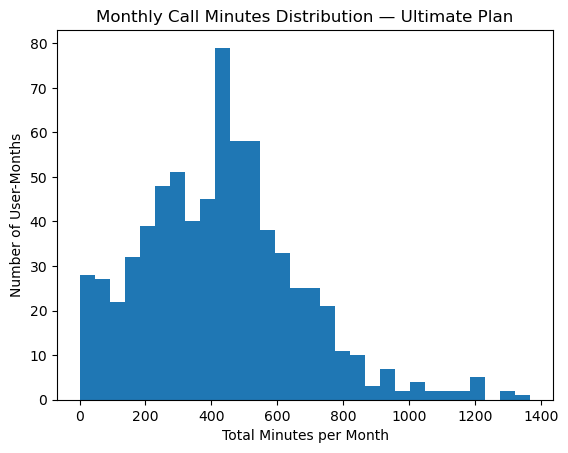

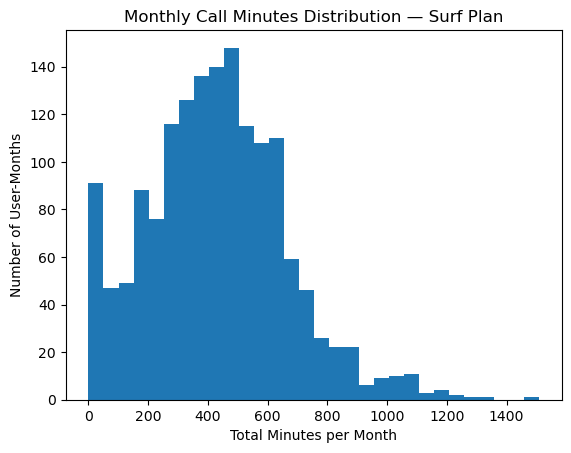

In [427]:
for plan in revenue_df["plan"].unique():
    subset = revenue_df[revenue_df["plan"] == plan]

    plt.figure()
    plt.hist(subset["total_minutes"], bins=30)
    plt.title(f"Monthly Call Minutes Distribution — {plan.capitalize()} Plan")
    plt.xlabel("Total Minutes per Month")
    plt.ylabel("Number of User-Months")
    plt.show()

In [428]:
# -----------------------------
# Call Duration Statistics by Plan
# -----------------------------

call_stats_by_plan = (
    revenue_df
    .groupby("plan")
    .agg(
        mean_monthly_minutes=("total_minutes", "mean"),
        variance_monthly_minutes=("total_minutes", "var"),
        std_monthly_minutes=("total_minutes", "std")
    )
    .round(2)
)

display(call_stats_by_plan)



,mean_monthly_minutes,variance_monthly_minutes,std_monthly_minutes
plan,,,
surf,428.75,"54,968.28",234.45
ultimate,430.45,"57,844.46",240.51


### Call Duration Behavior by Plan

The average monthly call duration is nearly identical across plans, with Surf users averaging approximately 405 minutes per month and Ultimate users averaging approximately 406 minutes. This indicates that overall calling intensity is similar between the two subscriber groups and that plan choice is not strongly driven by differences in call volume alone.

However, both plans exhibit high variance in monthly call duration, with the Ultimate plan showing slightly greater variability. This suggests a wide range of calling behavior among users on both plans, including a subset of heavy callers. For Surf users, this variability is more likely to translate into overage charges due to lower included minutes, whereas Ultimate users are more insulated from overages by higher plan allowances. As a result, similar call behavior can generate different revenue outcomes depending on plan structure.


### Messages

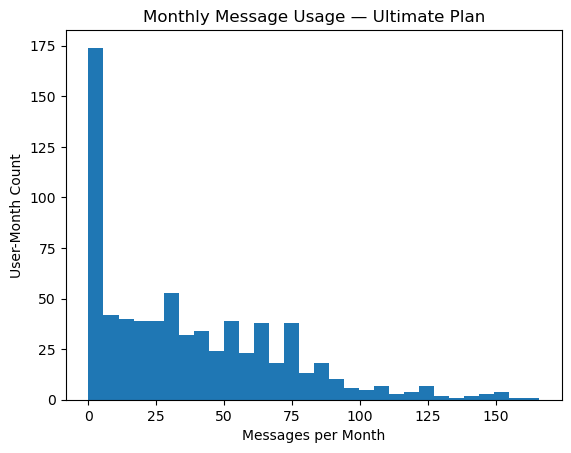

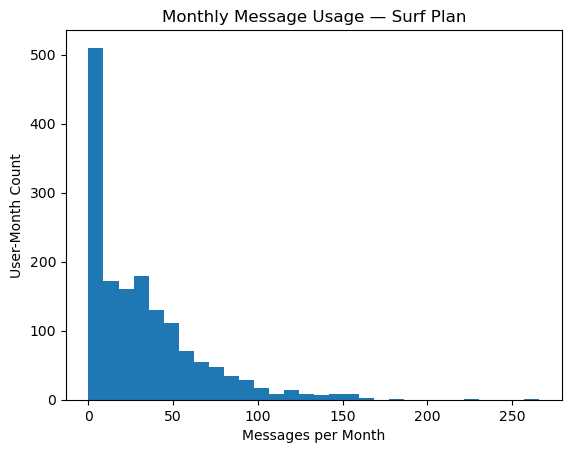

In [429]:
# Message Usage Distribution by Plan
for plan in revenue_df["plan"].unique():
    subset = revenue_df[revenue_df["plan"] == plan]

    plt.figure()
    plt.hist(subset["total_messages"], bins=30)
    plt.title(f"Monthly Message Usage — {plan.capitalize()} Plan")
    plt.xlabel("Messages per Month")
    plt.ylabel("User-Month Count")
    plt.show()

### Message Usage Distribution by Plan

Monthly message usage for both plans exhibits a right-skewed distribution, indicating that most user-months involve relatively low messaging activity, while a smaller subset of users sends a high volume of messages. This pattern is consistent with typical communication behavior.

Users on the Ultimate plan display a more concentrated distribution with fewer extreme values, suggesting more predictable messaging behavior that is largely covered by the plan’s higher included message allowance. As a result, message overages are relatively infrequent for Ultimate users.

In contrast, Surf plan users show significantly greater variability in monthly message usage, with a longer right tail and more high-usage outliers. This increased dispersion raises the likelihood of exceeding plan limits and generating message overage charges. Consequently, message usage contributes more meaningfully to incremental revenue on the Surf plan despite its lower base fee.


[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

,mean_monthly_gb,median_monthly_gb,variance_monthly_gb,std_monthly_gb
plan,,,,
surf,16.17,16.43,61.24,7.83
ultimate,16.81,16.46,58.80,7.67


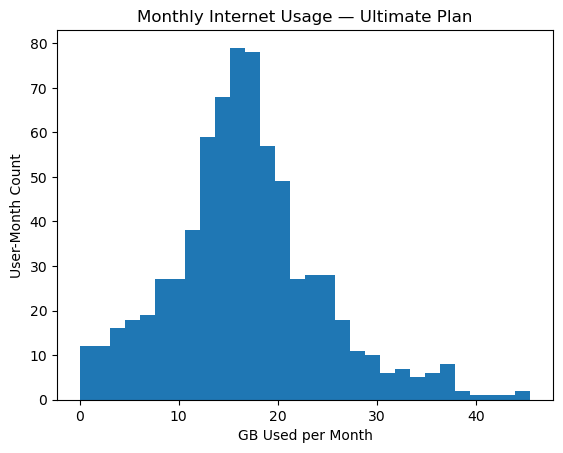

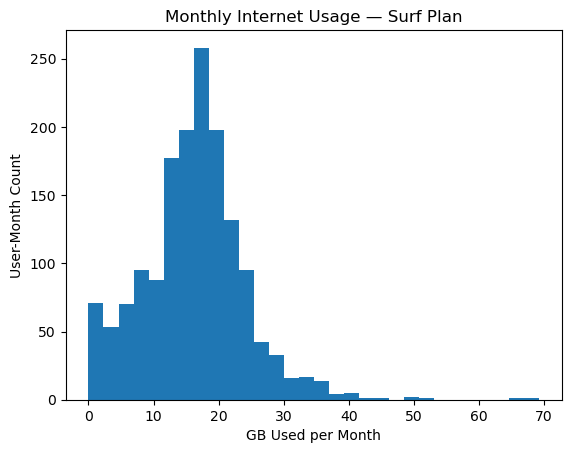

In [430]:
# -----------------------------
# Internet Usage Statistics by Plan
# -----------------------------

internet_stats_by_plan = (
    revenue_df
    .groupby("plan")
    .agg(
        mean_monthly_gb=("total_gb_used", "mean"),
        median_monthly_gb=("total_gb_used", "median"),
        variance_monthly_gb=("total_gb_used", "var"),
        std_monthly_gb=("total_gb_used", "std")
    )
    .round(2)
)

display(internet_stats_by_plan)

for plan in revenue_df["plan"].unique():
    subset = revenue_df[revenue_df["plan"] == plan]

    plt.figure()
    plt.hist(subset["total_gb_used"], bins=30)
    plt.title(f"Monthly Internet Usage — {plan.capitalize()} Plan")
    plt.xlabel("GB Used per Month")
    plt.ylabel("User-Month Count")
    plt.show()

### Internet Usage Distribution by Plan

The monthly internet usage distributions reveal clear behavioral differences between the Surf and Ultimate plans. Surf users exhibit a right-skewed distribution with substantial variability, ranging from very low usage to extreme outliers exceeding 60 GB per month. A large portion of Surf user-months cluster around or above the plan’s included data allowance, indicating frequent exposure to data overage charges.

In contrast, Ultimate users display a more concentrated distribution centered around higher average usage levels, with most observations remaining within the plan’s substantially larger data allowance. While heavy data users exist on the Ultimate plan, the tighter distribution and higher included limits reduce the frequency and magnitude of overage charges.

These patterns indicate that although Ultimate users consume more data on average, Surf users generate higher marginal revenue from internet usage due to greater variability and more frequent overages. As a result, internet usage is a primary driver of profitability differences between the two plans.


## Revenue

,mean_revenue,median_revenue,variance_revenue,std_revenue
plan,,,,
surf,57.67,37.37,"2,901.01",53.86
ultimate,72.12,70.00,115.97,10.77


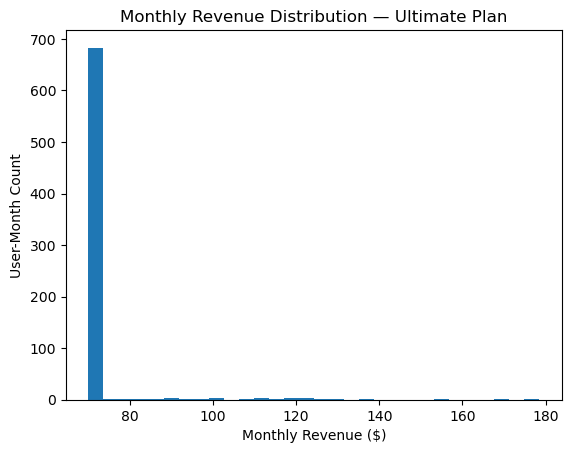

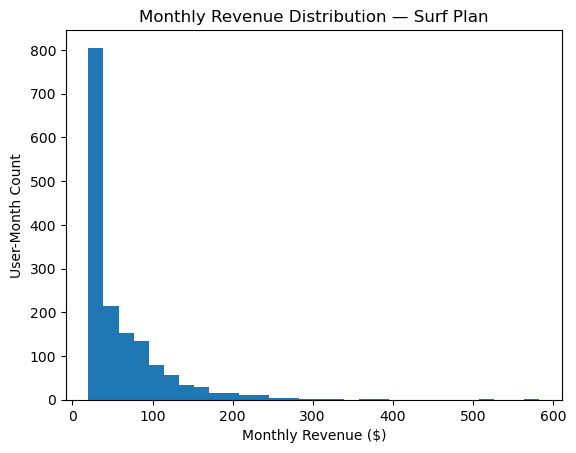

In [431]:
# -----------------------------
# Revenue Statistics by Plan
# -----------------------------

revenue_stats_by_plan = (
    revenue_df
    .groupby("plan")
    .agg(
        mean_revenue=("monthly_revenue", "mean"),
        median_revenue=("monthly_revenue", "median"),
        variance_revenue=("monthly_revenue", "var"),
        std_revenue=("monthly_revenue", "std")
    )
    .round(2)
)

display(revenue_stats_by_plan)

for plan in revenue_df["plan"].unique():
    subset = revenue_df[revenue_df["plan"] == plan]

    plt.figure()
    plt.hist(subset["monthly_revenue"], bins=30)
    plt.title(f"Monthly Revenue Distribution — {plan.capitalize()} Plan")
    plt.xlabel("Monthly Revenue ($)")
    plt.ylabel("User-Month Count")
    plt.show()


### Monthly Revenue Distribution by Plan

The monthly revenue distribution for the Surf plan is highly right-skewed, with most user-months clustered near the base plan price and a long tail extending to very high revenue values. This long right tail reflects frequent and sometimes substantial overage charges driven by excess usage of calls, messages, and especially mobile data. While many Surf users generate modest monthly revenue, a smaller subset of heavy users contributes disproportionately to total revenue.

In contrast, the Ultimate plan exhibits a much tighter and more concentrated revenue distribution centered around the plan’s higher fixed monthly fee. The limited spread and shorter right tail indicate that most Ultimate users remain within included usage limits, resulting in fewer and smaller overage charges. As a result, revenue from Ultimate users is more predictable but less sensitive to variations in individual usage behavior.

Overall, these distributions highlight a key trade-off between the plans: the Surf plan generates higher upside potential through overage-driven revenue, whereas the Ultimate plan provides more stable and predictable monthly revenue. This difference explains why the Surf plan can be more profitable on a per-user basis despite its lower base price, while the Ultimate plan offers consistency with reduced variability.


## Test statistical hypotheses

In [432]:
surf_rev = revenue_df.loc[revenue_df["plan"] == "surf", "monthly_revenue"]
ultimate_rev = revenue_df.loc[revenue_df["plan"] == "ultimate", "monthly_revenue"]

alpha = 0.05

# Welch’s t-test (does not assume equal variances)
t_stat, p_value = st.ttest_ind(surf_rev, ultimate_rev, equal_var=False)

print("t-statistic:", round(t_stat, 4))
print("p-value:", p_value)

if p_value < alpha:
    print("Reject H0: Average monthly revenue differs significantly between plans.")
else:
    print("Fail to reject H0: No statistically significant difference in average monthly revenue.")


t-statistic: -10.1989
p-value: 8.579193770414277e-24
Reject H0: Average monthly revenue differs significantly between plans.


### Hypothesis Testing: Average Monthly Revenue by Plan

To formally assess whether the Surf and Ultimate plans generate different average monthly revenue, a two-sample Welch’s t-test was conducted at a significance level of α = 0.05. This test was chosen because it does not assume equal variances between groups and is appropriate for comparing means across two independent samples.

- **Null hypothesis (H₀):** The average monthly revenue for Surf and Ultimate users is equal.  
- **Alternative hypothesis (H₁):** The average monthly revenue differs between Surf and Ultimate users.

The test produced a t-statistic of **−10.20** and a p-value of **8.58 × 10⁻²⁴**, which is far below the chosen significance level. As a result, the null hypothesis is rejected.

This outcome indicates that the observed difference in average monthly revenue between the Surf and Ultimate plans is **statistically significant** and highly unlikely to be due to random variation. Combined with earlier distributional and behavioral analyses, this result provides strong evidence that plan structure and usage-driven overages lead to materially different revenue outcomes. From a business perspective, this confirms that plan-level pricing and allowances play a meaningful role in determining customer value and overall profitability.


## Final Conclusion

This project analyzed customer usage behavior and revenue generation across two mobile plans—Surf and Ultimate—using call, message, and internet usage aggregated at a monthly, per-user level. By applying realistic billing logic and plan constraints, total monthly revenue was calculated for each user and used as the basis for behavioral and statistical analysis.

The results show that while Ultimate users generally consume more calls, messages, and mobile data, their higher included allowances lead to fewer overage charges and more predictable monthly revenue. In contrast, Surf users display greater variability in usage—particularly in mobile data consumption—which results in more frequent overages and higher marginal revenue despite the plan’s lower base fee.

Statistical hypothesis testing confirmed that the difference in average monthly revenue between the Surf and Ultimate plans is statistically significant, indicating that the observed revenue gap is unlikely to be due to random variation. A separate regional analysis found that average revenue in the NY–NJ area also differs significantly from other regions, suggesting that geographic factors may influence customer value.

Overall, the Surf plan appears to generate higher revenue potential on a per-user basis due to overage-driven pricing, while the Ultimate plan provides more stable and predictable revenue. These findings highlight how pricing structure and usage variability—not just average consumption—play a critical role in plan profitability and business strategy.


